In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


CLUSTERING

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [5]:
from sklearn.preprocessing import StandardScaler
numerical_features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)
scaled_df = pd.DataFrame(data=scaled_features, columns=numerical_features.columns)

In [10]:
print(data.columns)


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [11]:
print(data['Genre'].dtype)


object


In [16]:
encoded_data = pd.get_dummies(data, columns=['Genre'], prefix=['Genre'], drop_first=False)

In [17]:
encoded_data = pd.get_dummies(data, columns=['Genre'], prefix=['Genre'])

In [15]:
encoded_data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False
...,...,...,...,...,...,...
195,196,35,120,79,True,False
196,197,45,126,28,True,False
197,198,32,126,74,False,True
198,199,32,137,18,False,True


In [ ]:
VISUALIZATION

In [23]:
from sklearn.cluster import KMeans
numerical_features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
clusters = kmeans.fit_predict(numerical_features)

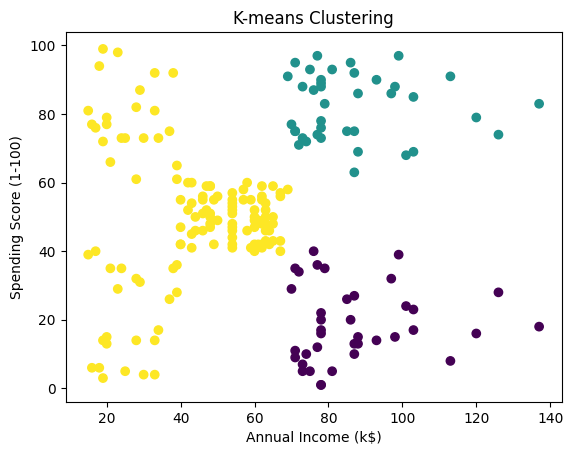

In [24]:
import matplotlib.pyplot as plt

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=clusters)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering')
plt.show()


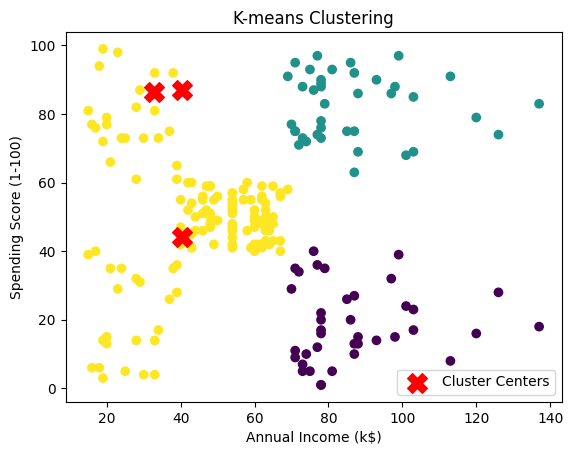

In [25]:
centers = kmeans.cluster_centers_
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=clusters)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', c='red', label='Cluster Centers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering')
plt.legend()
plt.show()


In [ ]:
INTERPRETATION

In [26]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=numerical_features.columns))


Cluster Centers:
         Age  Annual Income (k$)  Spending Score (1-100)
0  40.394737           87.000000               18.631579
1  32.692308           86.538462               82.128205
2  40.325203           44.154472               49.829268


In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
clusters = kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])
data['Cluster'] = clusters

In [32]:
data.head()
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2
199,200,Male,30,137,83,1


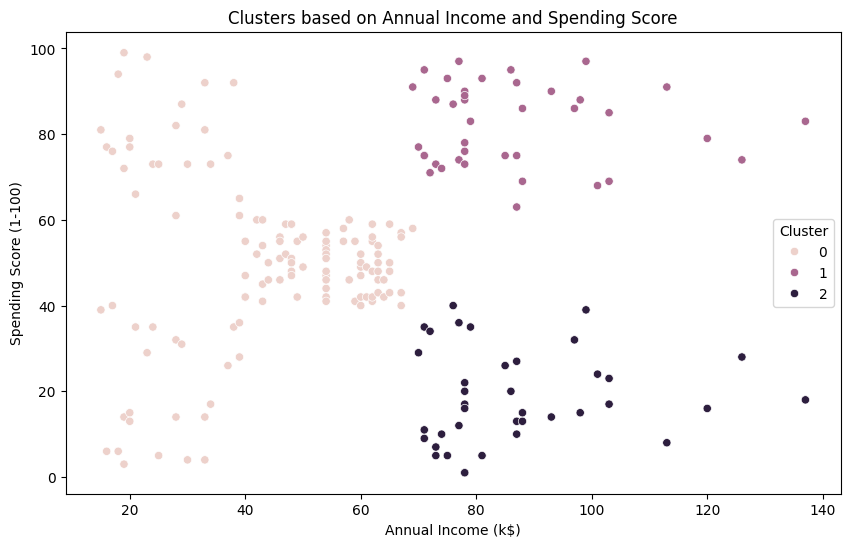

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data)
plt.title("Clusters based on Annual Income and Spending Score")
plt.show()

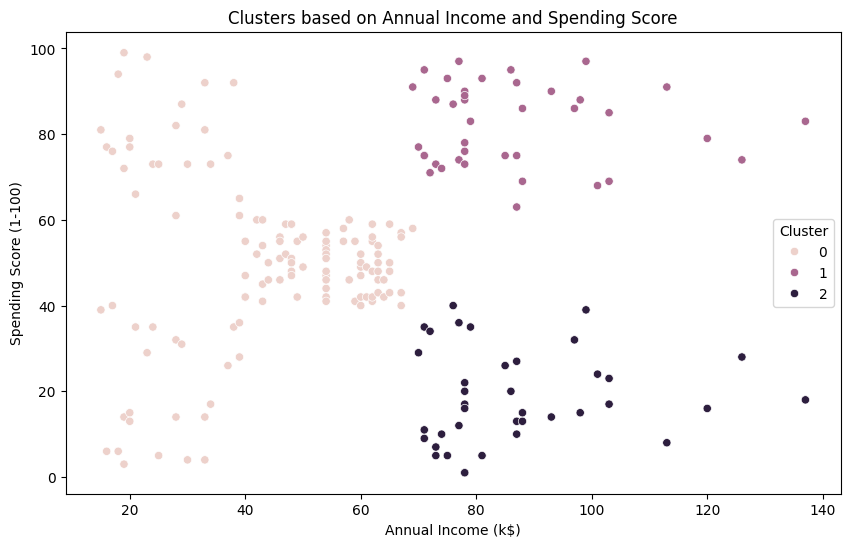

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data)
plt.title("Clusters based on Annual Income and Spending Score")
plt.show()


In [36]:
cluster_sizes = data['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)


Cluster Sizes:
Cluster
0    123
1     39
2     38
Name: count, dtype: int64


In [37]:
cluster_labels = {
    0: "High Income, High Spending",
    1: "Low Income, High Spending",
    2: "Low Income, Low Spending"
}
data['Cluster Label'] = data['Cluster'].map(cluster_labels)
